In [1]:

import os.path as osp
shared_folder = osp.abspath(osp.join('..', '..', 'share'))
import sys
if shared_folder not in sys.path: sys.path.insert(1, shared_folder)
from notebook_utils import NotebookUtilities
nu = NotebookUtilities(
    data_folder_path=osp.abspath(osp.join('..', 'data')),
    saves_folder_path=osp.abspath(osp.join('..', 'saves'))
)

# Import needed libraries
%pprint
sys.path.insert(1, osp.join('..', 'py'))

%matplotlib inline
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import textwrap
import warnings

# Turn off warnings
warnings.filterwarnings('ignore')

Pretty printing has been turned OFF


In [2]:

generations_df = nu.load_object('generations_df')
turning_numbers_df = nu.load_object('turning_numbers_df')
turnings_df = nu.load_object('turnings_df')

In [3]:

# nu.get_dir_tree('NotebookUtilities', contains_str=None, not_contains_str=None)


# Catholic Papacy

In [18]:

# <a href="/wiki/Pope_Vitalian" title="Pope Vitalian">Vitalian</a>
# table > tbody > tr td > b > a
if nu.pickle_exists('catholic_papacy_df'):
    catholic_papacy_df = nu.load_object('catholic_papacy_df')
else:
    from bs4 import BeautifulSoup as bs
    from pandas import DataFrame
    wikipedia_url = 'https://en.wikipedia.org/wiki/List_of_popes'
    tables_df_list = nu.get_page_tables(wikipedia_url, verbose=False)
    columns_list = [
        'Pontiffnumber', 'Pontificate', 'Name: English· Latin', 'Date and Place of birth', 'Age at start/end of papacy', 'Notes', 'Portrait', 'Personal name'
    ]
    catholic_papacy_df = DataFrame([], columns=columns_list)
    for df in tables_df_list:
        if('Pontiffnumber' in df.columns):
            catholic_papacy_df = pd.concat([catholic_papacy_df, df], axis='index', ignore_index=True)
    
    # Create a BeautifulSoup object from the Wikipedia page HTML
    page_soup = nu.get_page_soup(wikipedia_url, verbose=False)

    # Find all the tags that match the CSS selector.
    tags = page_soup.select("table > tbody > tr td > b > a")

    # Loop through the tags
    for link_soup in tags:
        papal_url = 'https://en.wikipedia.org' + link_soup['href']
        papal_title = link_soup['title']
        english_name = link_soup.text.strip()
        
        td_tag = nu.get_td_parent(link_soup, verbose=False)
        if not (td_tag.has_attr('rowspan') or td_tag.has_attr('colspan')):
            
            # Go back two siblings and get the Pontiff Number text
            pontiff_number = nu.get_style_column(link_soup, verbose=False).text.strip()
            
            # Go back one sibling and get the Pontificate
            pontificate_str = nu.get_td_parent(link_soup, verbose=False).previous_sibling.previous_sibling.text.strip()
            
            # Connect the soup with the data frame
            mask_series = catholic_papacy_df['Name: English· Latin'].map(lambda x: english_name in str(x))
            mask_series &= catholic_papacy_df['Pontiffnumber'].map(lambda x: pontiff_number == str(x).strip())
            df = catholic_papacy_df[mask_series]
            if (df.shape[0] != 1):
                mask_series &= catholic_papacy_df['Pontificate'].map(lambda x: pontificate_str == str(x).strip())
                df = catholic_papacy_df[mask_series]
            
            # Add the link soup attributes as new columns
            if (df.shape[0] == 1):
                catholic_papacy_df.loc[df.index, 'wikipedia_url'] = papal_url
                catholic_papacy_df.loc[df.index, 'papal_title'] = papal_title
                catholic_papacy_df.loc[df.index, 'english_name'] = english_name
    
    # Manually add in the Wikipedia URLs of the antipopes
    url = 'https://en.wikipedia.org/wiki/Novatian'
    catholic_papacy_df.loc[23, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Clement_VII'
    catholic_papacy_df.loc[236, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Laurentius'
    catholic_papacy_df.loc[57, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Anacletus_II'
    catholic_papacy_df.loc[188, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_John_XXIII'
    catholic_papacy_df.loc[242, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Hippolytus_of_Rome'
    catholic_papacy_df.loc[17, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Pope_Leo_VIII'
    catholic_papacy_df.loc[140, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Sylvester_IV'
    catholic_papacy_df.loc[181, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Clement_III'
    catholic_papacy_df.loc[175, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Pope-elect_Stephen'
    catholic_papacy_df.loc[99, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Paschal_III'
    catholic_papacy_df.loc[197, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Clement_VIII'
    catholic_papacy_df.loc[245, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_John_XVI'
    catholic_papacy_df.loc[152, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Felix_II'
    catholic_papacy_df.loc[39, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Amadeus_VIII,_Duke_of_Savoy'
    catholic_papacy_df.loc[249, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Gregory_VIII'
    catholic_papacy_df.loc[183, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Innocent_III'
    catholic_papacy_df.loc[199, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Honorius_II'
    catholic_papacy_df.loc[172, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Victor_IV_(1159%E2%80%931164)'
    catholic_papacy_df.loc[196, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Benedict_XIII'
    catholic_papacy_df.loc[237, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Nicholas_V'
    catholic_papacy_df.loc[229, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Eulalius'
    catholic_papacy_df.loc[46, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Teobaldo_Boccapecci'
    catholic_papacy_df.loc[185, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Callixtus_III'
    catholic_papacy_df.loc[198, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Alexander_V'
    catholic_papacy_df.loc[241, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Theodoric'
    catholic_papacy_df.loc[179, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Sede_vacante'
    catholic_papacy_df.loc[222, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Sede_vacante'
    catholic_papacy_df.loc[213, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Sede_vacante'
    catholic_papacy_df.loc[293, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Sede_vacante'
    catholic_papacy_df.loc[243, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Sede_vacante'
    catholic_papacy_df.loc[227, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Victor_IV_(1138)'
    catholic_papacy_df.loc[189, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Dioscorus'
    catholic_papacy_df.loc[62, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Adalbert'
    catholic_papacy_df.loc[180, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Boniface_VII'
    catholic_papacy_df.loc[146, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Ursicinus'
    catholic_papacy_df.loc[41, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Natalius'
    catholic_papacy_df.loc[15, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Boniface_VII'
    catholic_papacy_df.loc[149, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Benedict_X'
    catholic_papacy_df.loc[170, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Christopher'
    catholic_papacy_df.loc[127, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Gregory_VI'
    catholic_papacy_df.loc[157, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Benedict_XIV'
    catholic_papacy_df.loc[246, 'wikipedia_url'] = url
    url = 'https://en.wikipedia.org/wiki/Antipope_Benedict_XIV'
    catholic_papacy_df.loc[247, 'wikipedia_url'] = url
    
    # Loop through the Wikipedia URLs
    mask_series = catholic_papacy_df.wikipedia_url.isnull()
    df = catholic_papacy_df[~mask_series]
    for row_index, row_series in df.iterrows():

        # Get the infobox data
        wikipedia_url = row_series.wikipedia_url
        page_soup = nu.get_page_soup(wikipedia_url, verbose=False)
        for th_soup in page_soup.find_all(
            name='th',
            attrs={'scope': 'row', 'class': 'infobox-label'},
            recursive=True,
        ):
            key = th_soup.text
            td_soup = th_soup.find_next_sibling(name='td', attrs={'class': 'infobox-data'})
            value = td_soup.text

            value = re.sub(r'[ \u2009\xa0\[]+', ' ', str(value).strip())
            key = re.sub(r'[ \u2009\xa0\[]+', '_', key.strip('_'))
            catholic_papacy_df.loc[row_index, key] = value
    
    # Loop through the Born column
    mask_series = catholic_papacy_df.Born.isnull()
    df = catholic_papacy_df[~mask_series]
    for row_index, row_series in df.iterrows():

        # set the birth data
        born_str = row_series.Born
        birth_year = nu.get_first_year_element(born_str)
        catholic_papacy_df.loc[row_index, 'year_of_birth'] = birth_year
    
    # Loop through the Died column
    mask_series = catholic_papacy_df.Died.isnull()
    df = catholic_papacy_df[~mask_series]
    for row_index, row_series in df.iterrows():

        # set the death data
        died_str = row_series.Died
        death_year = nu.get_first_year_element(died_str)
        catholic_papacy_df.loc[row_index, 'year_of_death'] = death_year
    
    # Loop through the Papacy_began column
    mask_series = catholic_papacy_df.Papacy_began.isnull()
    df = catholic_papacy_df[~mask_series]
    for row_index, row_series in df.iterrows():

        # set the birth data
        began_str = row_series.Papacy_began
        birth_year = nu.get_first_year_element(began_str)
        catholic_papacy_df.loc[row_index, 'year_reign_begin'] = birth_year
    
    # Loop through the Papacy_ended column
    mask_series = catholic_papacy_df.Papacy_ended.isnull()
    df = catholic_papacy_df[~mask_series]
    for row_index, row_series in df.iterrows():

        # set the death data
        died_str = row_series.Papacy_ended
        death_year = nu.get_first_year_element(died_str)
        catholic_papacy_df.loc[row_index, 'year_reign_end'] = death_year
        
    # Get a office rank column and make the year columnsnumeric
    catholic_papacy_df['office_rank'] = catholic_papacy_df.sort_values('year_reign_begin').reset_index(drop=True).index.map(lambda x: x+1)
    for cn in ['office_rank']+[cn for cn in catholic_papacy_df.columns if cn.startswith('year_')]:
        catholic_papacy_df[cn] = pd.to_numeric(catholic_papacy_df[cn], errors='coerce')
    
    # Get the generation name and turnings archetype
    for row_index, row_series in catholic_papacy_df.iterrows():
        year_of_birth = row_series.year_of_birth
        mask_series = (generations_df.birth_year_begin <= year_of_birth) & (generations_df.birth_year_end >= year_of_birth)
        df = generations_df[mask_series]
        if df.shape[0]:
            generation_name = df.index.tolist()[-1]
            catholic_papacy_df.loc[row_index, 'generation_name'] = generation_name
            turnings_archetype = df.turnings_archetype.tolist()[-1]
            catholic_papacy_df.loc[row_index, 'turnings_archetype'] = turnings_archetype
    
    # Get the turning info
    for row_index, row_series in catholic_papacy_df.iterrows():
        year_reign_begin = row_series.year_reign_begin

        # Get turning number
        mask_series = (turnings_df.turning_year_begin <= year_reign_begin) & (turnings_df.turning_year_end >= year_reign_begin)
        df = turnings_df[mask_series]
        if df.shape[0]:
            turning_number = df.turning_number.tolist()[-1]
            catholic_papacy_df.loc[row_index, 'turning_number'] = turning_number

            # Get turning type
            mask_series = (turning_numbers_df.index == turning_number)
            df = turning_numbers_df[mask_series]
            if df.shape[0]:
                turning_type = df.turning_type.tolist()[-1]
                catholic_papacy_df.loc[row_index, 'turning_type'] = turning_type

        # Get turning name
        mask_series = (turnings_df.turning_year_begin <= year_reign_begin) & (turnings_df.turning_year_end >= year_reign_begin)
        df = turnings_df[mask_series]
        if df.shape[0]:
            turning_name = df.index.tolist()[-1]
            catholic_papacy_df.loc[row_index, 'turning_name'] = turning_name
    
    # Fix various indexes and columns
    try: catholic_papacy_df.turning_number = catholic_papacy_df.turning_number.astype(int)
    except Exception as e: print(str(e).strip())
    catholic_papacy_df['age_at_inauguration'] = (
        catholic_papacy_df.year_reign_begin - catholic_papacy_df.year_of_birth
    )
    
    # Fix Papal Title and set the index to it
    mask_series = catholic_papacy_df.papal_title.isnull()
    catholic_papacy_df.loc[mask_series, 'papal_title'] = catholic_papacy_df[mask_series].wikipedia_url.map(lambda x: str(x).split('/')[-1].replace('_', ' '))
    catholic_papacy_df = catholic_papacy_df.set_index('papal_title')
    nu.store_objects(catholic_papacy_df=catholic_papacy_df)

In [12]:

display(catholic_papacy_df.sample(min(3, catholic_papacy_df.shape[0])).dropna(axis='columns', how='all').T)

papal_title,Pope Julius III,Pope Liberius,Pope Paul V
Pontiffnumber,221,36,233
Pontificate,"7 February 1550 –29 March 1555(5 years, 50 days)","17 May 352 –24 September 366(14 years, 130 days)","16 May 1605 –28 January 1621(15 years, 257 days)"
Name: English· Latin,Julius IIIIVLIVS Tertius,LiberiusLIBERIVS,Paul VPAVLVS Quintus
Date and Place of birth,"10 September 1487 Rome, Lazio, Papal States","c. 310 AD Rome, Italy, Roman Empire","17 September 1550 Rome, Lazio, Papal States"
Age at start/end of papacy,62 / 67,42 / 56,52 / 68
Notes,Subject and later the sovereign of the Papal S...,Roman citizen. Banished by the Arian-leaning E...,"Motto: Absit nisi in te gloriari (""May it be a..."
Personal name,Giovanni Maria Ciocchi del Monte,NaN,Camillo Borghese
wikipedia_url,https://en.wikipedia.org/wiki/Pope_Julius_III,https://en.wikipedia.org/wiki/Pope_Liberius,https://en.wikipedia.org/wiki/Pope_Paul_V
english_name,Julius III,Liberius,Paul V
Church,Catholic Church,Catholic Church,Catholic Church


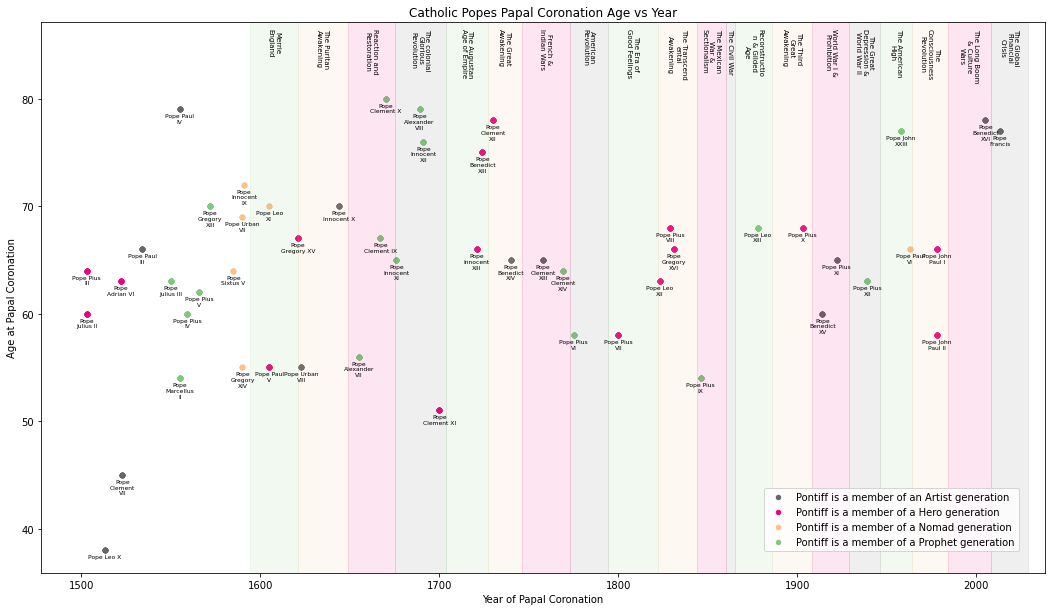

In [8]:

df1 = turnings_df.reset_index()
df2 = generations_df.reset_index()
on_list = list(set(df1.columns).intersection(set(df2.columns)))
df3 = df1.merge(df2, on=on_list)
nu.plot_inauguration_age(
    inauguration_df=catholic_papacy_df, groupby_column_name='turnings_archetype', xname='year_reign_begin', leader_designation='Pontiff',
    label_infix='is a member of', label_suffix='generation', info_df=df3, title_prefix='Catholic Popes', inaugruation_verb='Papal Coronation',
    legend_tuple=(0.72, 0.04), verbose=False
)

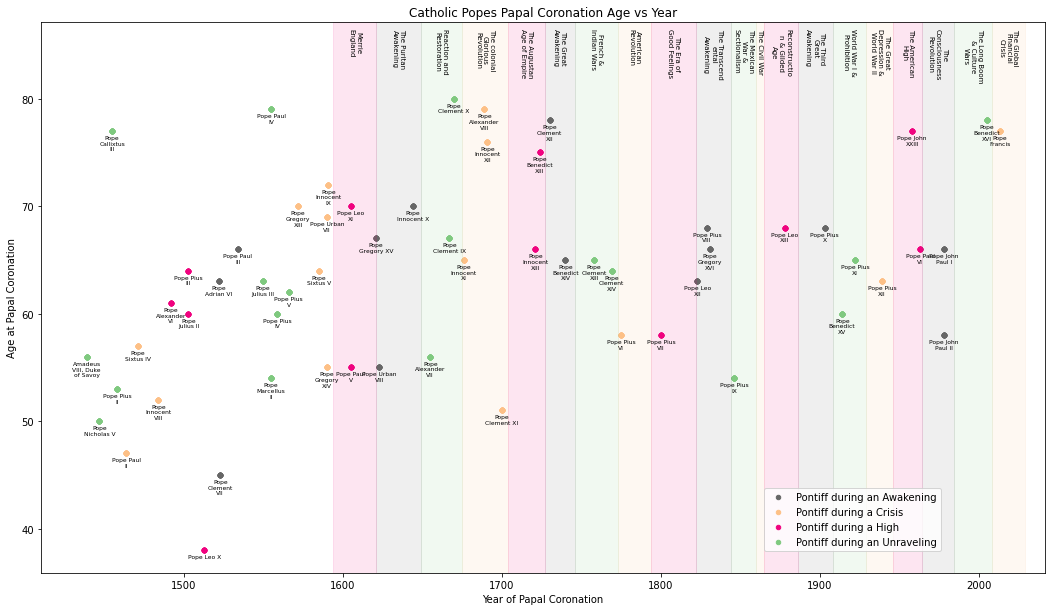

In [9]:

df1 = turnings_df.reset_index()
df2 = turning_numbers_df.reset_index().rename(columns={'index': 'turning_number'})
on_list = list(set(df1.columns).intersection(set(df2.columns)))
df3 = df1.merge(df2, on=on_list)
df4 = generations_df.reset_index()
on_list = list(set(df3.columns).intersection(set(df4.columns)))
df5 = df3.merge(df4, on=on_list)
nu.plot_inauguration_age(
    inauguration_df=catholic_papacy_df, groupby_column_name='turning_type', xname='year_reign_begin', leader_designation='Pontiff',
    label_infix='during', label_suffix='', info_df=df5, title_prefix='Catholic Popes', inaugruation_verb='Papal Coronation',
    legend_tuple=(0.72, 0.04), verbose=False
)

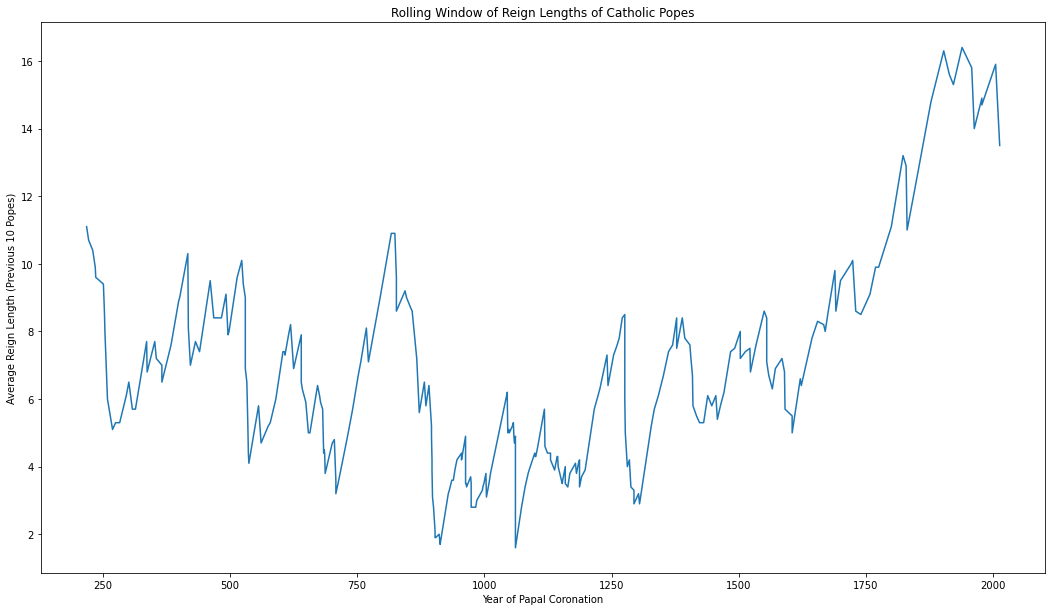

In [13]:

# Calculate the diff of the year_reign_begin column
mask_series = catholic_papacy_df.year_reign_begin.isnull()
df = catholic_papacy_df[~mask_series].year_reign_begin.sort_values().to_frame()
df['year_reign_begin_diff'] = df.year_reign_begin.diff()

# Plot a rolling window of the year_reign_begin_diff column
figwidth = 18
fig, ax = plt.subplots(figsize=(figwidth, figwidth/nu.twitter_aspect_ratio))
ax.plot(df.year_reign_begin, df.year_reign_begin_diff.rolling(window=10).mean())

# Set the title and labels
ax.set_title('Rolling Window of Reign Lengths of Catholic Popes')
ax.set_xlabel('Year of Papal Coronation')
ax.set_ylabel('Average Reign Length (Previous 10 Popes)');

# Make a comment about the 1500s
# annotation_str = '"May his days be few; may another take his position"\nPsalm 109:8'
# ax.annotate(text=annotation_str, xy=(1500, 18), xytext=(1500, 18), verticalalignment='top',
#             horizontalalignment='left', fontsize=10);